## ФИО студента: Васильев Кирилл Николаевич
## Номер группы: 18-ИВТ-2
## Вариант: 4
## Задание: house sales prediction

Цель лабораторной работы – получение навыков работы с методами регрессии
1.	~~Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).~~
2.	~~Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;~~
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlotдля признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйтеперекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.

1 – линейная регрессия без использования регуляризаторов;
2 – линейная регрессия, LASSOрегуляризатор;


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (train_test_split)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from  sklearn import linear_model
%matplotlib inline

In [55]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 1

1. id - уникальный идентификатор для каждого проданного дома
2. date - дата продажи дома
3. price - цена каждого проданного дома
4. bedrooms - Количество спален
5. bathrooms - Количество ванных комнат, где .5 составляет комнату с туалетом, но без душа
6. sqft_living - площадь жилой площади квартир
7. sqft_lot - площадь участка земли
8. floors - Количество этажей
9. waterfront - фиктивная переменная для того, видела ли квартира набережную или нет
10. view - индекс от 0 до 4 того, насколько хорошо было видно свойство
11. condition - индекс от 1 до 5 на состояние квартиры,
12. grade - индекс от 1 до 13, где 1-3 не соответствует конструкции здания и дизайна, 7 имеет средний уровень строительства и дизайна, а 11-13 имеют высокий уровень качества строительства и дизайна.
13. sqft_above - квадратные метры внутренней жилой площади над уровнем земли
14. sqft_basement - квадратные метры внутренней жилой площади, которая находится ниже уровня земли
15. yr_built - год, когда дом был построен
16. yr_renovated - год последней реконструкции дома
17. zipcode - в какой области почтовый индекс дома
18. lat - широта
19. long - долгота
20. sqft_living15 - площадь жилой площади внутреннего жилья для ближайших 15 соседей
21. sqft_lot15 - Квадратные метры земельных участков ближайших 15 соседей

In [57]:
df.shape #Количество записей

(21613, 21)

# 2

In [58]:
print('Длина до удаления:', len(df))
df = df.drop_duplicates()
df = df.dropna()
print('Длина после удаления:', len(df))

Длина до удаления: 21613
Длина после удаления: 21613


# 3

In [59]:
df = df.drop(['id', 'date', 
              'yr_built', 'yr_renovated'], axis = 1)
numerical_columns   = ['price', 'bedrooms', 'bathrooms', 
                       'sqft_living', 'sqft_lot', 'floors', 
                       'sqft_above', 'sqft_basement', 'lat',
                       'long', 'sqft_living15', 'sqft_lot15']
print (f"Числовые признаки: {numerical_columns}")

Числовые признаки: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


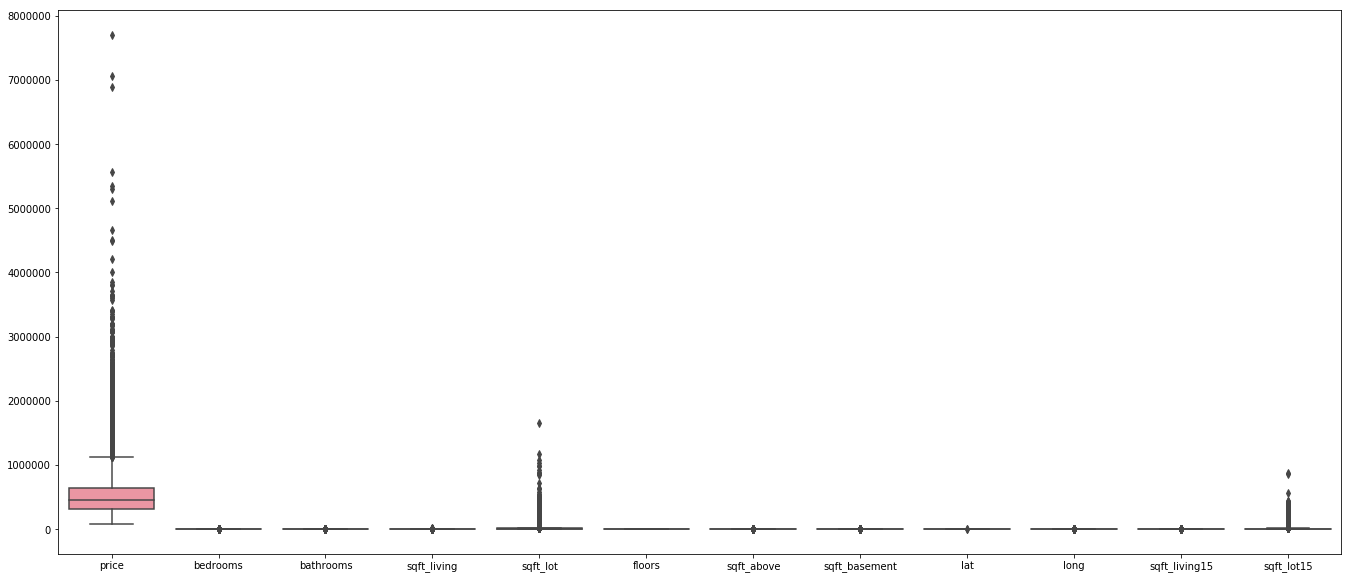

In [60]:
plt.figure(figsize=(23,10))
sns.boxplot(data=df[numerical_columns])
plt.show()

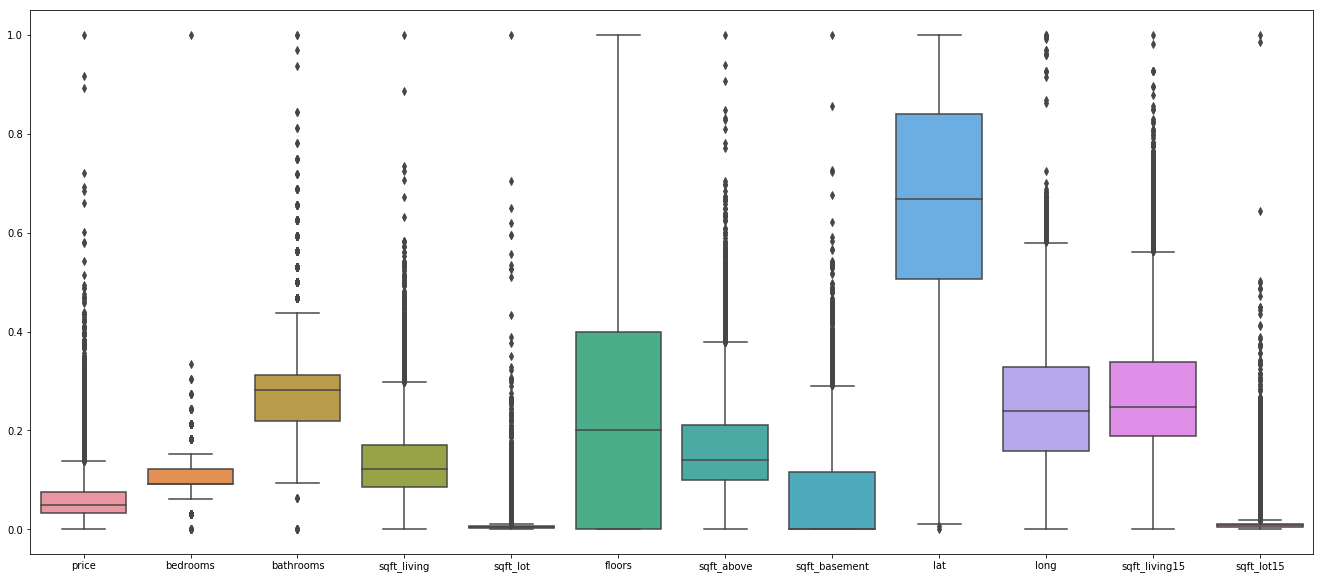

In [61]:
plt.figure(figsize=(23,10))
df[numerical_columns] = MinMaxScaler().fit_transform(df[numerical_columns].values.astype(float))
sns.boxplot(data = df[numerical_columns])
plt.show()

# 4

In [62]:
df.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [63]:
categorial = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
df[categorial]

,waterfront,view,condition,grade,zipcode
0,0,0,3,7,98178
1,0,0,3,7,98125
2,0,0,3,6,98028
3,0,0,5,7,98136
4,0,0,3,8,98074
5,0,0,3,11,98053
6,0,0,3,7,98003
7,0,0,3,7,98198
8,0,0,3,7,98146
9,0,0,3,7,98038


# 5

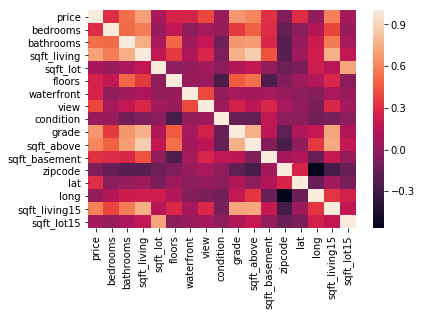

In [64]:
sns.heatmap(df.corr())

# 6

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 17 columns):
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null float64
sqft_lot         21613 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null float64
sqft_basement    21613 non-null float64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null float64
sqft_lot15       21613 non-null float64
dtypes: float64(12), int64(5)
memory usage: 3.0 MB


# 7

линейная регрессия без использования регуляризаторов

In [68]:
x, y = df.drop(['price'], axis=1), df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
pred_reg = reg.predict(x_test)
print(pred_reg[:15] - y_test[:15])

5506     0.008285
9279     0.010332
16034    0.026065
6608     0.023220
20359   -0.000400
8798     0.001058
10035   -0.008127
13321    0.015162
15842    0.029890
12119    0.026363
1799    -0.001654
15078   -0.029110
19275   -0.014118
4699    -0.001345
4762    -0.035416
Name: price, dtype: float64


In [69]:
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.8298919842790182 p_value: 0.0
Spearmen correlation: 0.8437884537189452 p_value: 0.0


линейная регрессия, LASSO регуляризатор

In [72]:
x, y = df.drop(['price'], axis=1), df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
pred_reg = lasso.predict(X = x_test)
print(pred_reg[:15] - y_test[:15])

5506     0.002043
9279     0.016298
16034   -0.031840
6608    -0.059344
20359    0.033893
8798     0.046270
10035   -0.019213
13321    0.035083
15842    0.008453
12119    0.002711
1799     0.008636
15078   -0.014945
19275   -0.024456
4699    -0.085374
4762    -0.171857
Name: price, dtype: float64


In [73]:
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.043439164570526004 p_value: 0.0004672843167343484
Spearmen correlation: -0.003218782921666619 p_value: 0.7955290083149574
